# Classification de textes
                                            Emanuela Boros
                                            Université de 
                                            La Rochelle
Clement Boesmier ECI1-1

# 1. Introduction

La classification des objets consiste à attribuer une classe à un objet. Ce objet peut être de type texte, image, audio ou vidéo. Pour savoir comment classifier un objet, il est important de connaître les caracteristiques qui definissent une classe. Par exemple, si on considere les caracteristiques : quantités de roues, selle, guidon, et frein. Un vélo ordinaire est composé de deux roues, une selle et un guidon. Une voiture a 4 roues, des freins mais pas de selle ni cadre ni guidon. Une moto est aussi composée de deux roues, une selle, des friens et un guidon. Avec ces caracteristiques, la moto et le vélo ont la même répresentation.

Nous pourrions compliquer encore plus cette tâche et essayer de classifier les chihuahuas ou muffins suivants. Pour faire cela, quelles sont les caracteristiques pertinentes à analyser ?

<figure>
    <center>
    <img src="images/classification.jpeg" width="400" height="600">
    <figcaption>Source: <a href="https://www.freecodecamp.org/news/chihuahua-or-muffin-my-search-for-the-best-computer-vision-api-cbda4d6b425d/">Link</a></figcaption>
    </center>
</figure>

Vous trouvez ça difficile ? Vous avez raison.

La quantité et la pertinence des caracteristiques peuvent aider à classifier des objets. Plus les caracteristiques sont indépendantes et différentes, plus on aura d'informations complementaires sur l'objet analysé.

En suivant cette méthode, nous analyserons dans ce cours la classification de textes. Il est très important de faire attention aux caracteristiques pour chaque objet (dans ce cas : les mots et leurs caractéristiques). Notre objectif est d'avoir des caracteristiques pertinentes pour mieux définir un objet et pouvoir l'attribuer à une catégorie correctement.


<figure>
    <center>
    <img src="images/text_processing_flow.png" width="700" height="100">
    <figcaption>Source: <a href="https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/">Link</a></figcaption>
    </center>
</figure>


Dans ce cours, nous explorerons un ensemble de données, une analyse de texte et plusieurs approches basées sur l'apprentissage automatique et profond, de la manière suivante:

- **Récupération** du corpus de textes (*.csv, *.txt, *.json, etc.)
- **Prétraitement** des données textuelles (text pre-processing) : tokenisation etc
- **Exploration** du corpus (*EDA*, exploratory data analysis) : analyse des fréquences
- **Representation** des mots (bag of words, *sac de mots*, TF-IDF, plongements de mots, *word embeddings*)
- **Apprentissage automatique** (machine learning) et **apprentissage profond** (deep learning)
- **Analyse d'erreurs** (evaluation, etc.)

# 2. Récupération, Prétraitement et Exploration du corpus de textes


### 2. 1. Contexte

Le gouvernement américain a attaqué en justice cinq grands groupes américains du tabac pour avoir amassé d'importants bénéfices en mentant sur les dangers de la cigarette. Le cigarettiers  se sont entendus dès 1953, pour "mener ensemble une vaste campagne de relations publiques afin de contrer les preuves de plus en plus manifestes d'un lien entre la consommation de tabac et des maladies graves". 

Dans ce procès 6,910,192 de documents ont été collectés et numérisés. Afin de faciliter l'exploitation de ces documents par les avocats, vous êtes en charge de mettre en place une classification automatique des types de documents: **Advertisement, Email, Form, Letter, Memo, News, Note, Report, Resume, Scientific**.


<table>
  <tr>
    <td>Letter</td>
     <td>News</td>
  </tr>
  <tr>
    <td><img src="images/50661869-1869.jpg" width=270 height=480></td>
    <td><img src="images/10031617.jpg" width=270 height=480></td>
  </tr>
 </table>


Un échantillon aléatoire des documents a été collecté et des opérateurs ont classé les documents dans des répertoires correspondant aux classes de documents : lettres, rapports, notes, email, etc. Vous avez à votre disposition : 

- le texte contenu dans les documents obtenu par OCR (en anglais : optical character recognition; signifie reconnaissance optique de caractères ou reconnaissance de texte, une technologie qui permet de convertir différents types de documents tels que les documents papiers scannés en fichiers modifiables - texte); <ins>**path**</ins>
- les classes des documents définies par des opérateurs; <ins>**label**</ins>

Aprés téléchargement et extraction du fichier compressé, nous pourrons charger et regarder le structure de ces commentaires avec la bibliothèque pandas (plus d'info [```pandas```](https://pandas.pydata.org/docs/user_guide/index.html)).



In [1]:
import pandas as pd # https://pandas.pydata.org/docs/

data = pd.read_csv('data/Tobacco3482-text/tobacco_texts.csv')#.sample(frac=.5) # lire le fichier .csv

In [2]:
data.size

1392

In [3]:
data.head() # afficher les 5 premières lignes

,path,label
0,data/Tobacco3482-text/Scientific/2051025161.txt,Scientific
1,data/Tobacco3482-text/Note/87705667.txt,Note
2,data/Tobacco3482-text/Scientific/50590463-0469...,Scientific
3,data/Tobacco3482-text/Resume/50617225-7226.txt,Resume
4,data/Tobacco3482-text/News/2078115137.txt,News


In [4]:
data.tail() # afficher les 5 dernières lignes

,path,label
691,data/Tobacco3482-text/Note/12882100.txt,Note
692,data/Tobacco3482-text/Form/2505233645_3646.txt,Form
693,data/Tobacco3482-text/Memo/2048153405_20481534...,Memo
694,data/Tobacco3482-text/Scientific/50492374-2377...,Scientific
695,data/Tobacco3482-text/Form/2505106228.txt,Form


Avec Pandas, nous pouvons commencer avec quelques statistiques simples. Les résultats suivants seront dans l'ordre décroissant de sorte que le premier élément soit l'élément le plus fréquent.

In [5]:
data.label.value_counts()

Memo             127
Email            118
Letter           105
Form              98
Scientific        60
Report            49
News              42
Advertisement     41
Note              36
Resume            20
Name: label, dtype: int64

Avec Pandas, nous pouvons également visualiser ces statistiques.

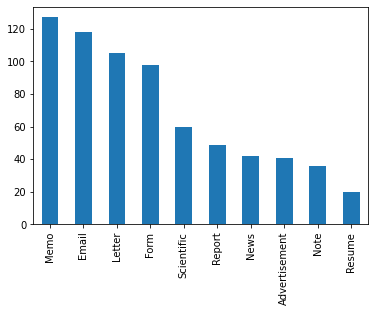

In [6]:
_ = data.label.value_counts().plot(kind='bar')

Nous avons vu que le fichier .csv contenait les chemins et les étiquettes des documents. Maintenant, nous devons lire les fichiers à partir des chemins spécifiés pour obtenir les données textuelles.

**<span style="color:red">To do</span>**:

> * Pour chaque chemin dans le dataframe, lisez le fichier associé et ajoutez les textes dans un vecteur. 


In [7]:
import os

texts = []
for idx, line in data.iterrows(): # itérer dans un dataframe Pandas
    # YOUR CODE HERE
    f = open(line.path,"r")
    texts.append(f.read())
    f.close()
    # END CODE
data['text'] = texts # créer une nouvelle colonne dans le dataframe Pandas avec les textes associés

In [8]:
data.head(10) # visualisez les donnees

,path,label,text
0,data/Tobacco3482-text/Scientific/2051025161.txt,Scientific,MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUA...
1,data/Tobacco3482-text/Note/87705667.txt,Note,2/14/90\n\n \n\nDATE:\n\n \n\n \n \n\nSUBJE...
2,data/Tobacco3482-text/Scientific/50590463-0469...,Scientific,"Cell, Vol. 59, 1107-1113, December 22, 1989, C..."
3,data/Tobacco3482-text/Resume/50617225-7226.txt,Resume,BIOGRAPHICAS SKETCH\n\nGive the following info...
4,data/Tobacco3482-text/News/2078115137.txt,News,"Tae NEWS & OBSERVER\n\nFaday, Ocroagr 15, 1999..."
5,data/Tobacco3482-text/Memo/96008379.txt,Memo,TOBACCO COMPANY\n\n24300 CATHERINE INDUSTRIAL ...
6,data/Tobacco3482-text/Report/10176813.txt,Report,PB ES FOOT\n\nGRANT APPLICATION No. 814A\n\nSu...
7,data/Tobacco3482-text/Memo/94011032_94011033.txt,Memo,THE TOBACCO INSTITUTE\n\n1875 | STREET. NORTHW...
8,data/Tobacco3482-text/Letter/502406921_5024069...,Letter,Loe ey PYF at nn peg py pee ry 84\nwipe rPVOUU...
9,data/Tobacco3482-text/Memo/2046000414_20460004...,Memo,"- PHILIP MORRIS COMPANIES INC, _ INTER-OFFICE\..."


Exemple tiré de l'ensemble de données Tobacco:

In [9]:
print(data['text'][0])

MONTHLY SUMMARY

25 JANUARY 1986-
24 FEBRUARY 1986

FOR: David Douglas
1. Non-burning smoking article:

Additional work on this subject was done this month by examining the
filtration effect of a cellulose acetate filter versus no filter. The
sample examined was an IFF tobacco neutral fraction flavor. Fifty
microliters of the sample were applied to a piece of filter paper inside a
plastic tube like those used by Flavor Development for the non-burning
smoking article. Thirty-five ml puffs were withdrawn alternately at one end
containing a CA filter and at the other end, which was open. The results of
chromatograms produced by samples taken in these ways showed that the later,
more polar, less volatile components are reduced disproportionately when
puffed through the CA filter compared to a sample taken with no filter.

This observation could have implications for the use of tobacco-identical
flavors in both burning and non-burning smoking products, since this flavor
is apparently natura

In [10]:
print('Classe :', data['label'][0])

Classe : Scientific


Étant donné que cet ensemble de données a été numérisé, des problèmes peuvent apparaître avec les données. Il n'y a toujours pas d'outils OCR qui fonctionnent au niveau humain dans la plupart des applications. L'existence aujourd'hui de plusieurs outils de ce type a conduit peu à peu à définir des critères de choix pour sélectionner l'OCR le plus efficace et surtout le mieux adapté à son application. Longtemps, le critère d'efficacité était lié à un taux de reconnaissance élevé, pensant qu'une technologie efficace est une technologie sans défaut. En effet, il faut admettre quele taux de 100% reste un objectif à atteindre.

Les erreurs incluent une mauvaise lecture des lettres, le saut de lettres illisibles ou la combinaison de texte de colonnes adjacentes ou de légendes d'image. Bien que de nombreux facteurs affectent les performances des outils OCR, le nombre d'erreurs dépend de la qualité et de la forme du texte, y compris du font utilisé.


<figure>
    <center>
    <img src="images/1004859787.jpg" width="300" height="100">
    <figcaption>News</figcaption>
    </center>
</figure>


Un exemple d'un tel document, avec de nombreuses erreurs de reconnaissance de caractères et de mots :

In [11]:
print(data['text'][57])

”

 

 
   

B Tannen aa
CRSBURG CAG Stee cS

oe oe) eee

 
  
  
    
  
  
   

 

    
 

 

ae

‘ined ae

cee «eee ‘and a ohne
sia Pos ecm se E et pur ita

(par, tment. o Spur’. peusENrarceye
“pla ae ake

  
 
   
    
 
  
 
 
 

   
  

   

 

 

pe Gores. PO Fe et ree ca
Eethtut fons. “for “research ieee
plems.. éommion

university: and in

 
  

i ee THE ‘PROGRAM I HE ‘outlined {

nya
ea A os

 

      
  

         
   
  
   
  
 
 
 
 
    

   
  

   
    

   

ithe “concept” of the’ land-gre as VPI wh
! eir eatly days’ were geared. p mar 5 a pare
te Hahn, “a ‘physicist, Thursday ¢ *

“the ‘teins of the educational “iris is
; which. he has “headed,‘since ast. ‘July. ii
‘the “youfigest NPI president ever a:

Saent in ‘the. nation’s ‘land- nt; 3
is Engineeri g ‘students | now2ecinprise “B nae
“and students” in the ‘non-agricultural, “an


In [12]:
print('Classe :', data['label'][57])

Classe : News


La figure correspond au texte et il est visible que sa qualité est faible.

### 2.2 Pré-traitement de texte 

Dans tout processus d'analyse de texte, la première et la plus importante des étapes est de **constituer un corpus**, un ensemble de documents, et de **le nettoyer** afin de l'exploiter. 

Les étapes de prétraitement (*preprocessing*) sont cruciales car elles permettent de **nettoyer le texte** de tous ses éléments qui ne sont **pas porteurs de sens**, et le préparent pour l’analyse.
Les différentes étapes sont :
1. La ***tokenisation*** est un moyen de séparer un morceau de texte en unités plus petites appelées **tokens**. Les **tokens** sont généralement des **mots**.

2. La ***normalisation*** du texte est importante pour les textes bruyants comme par exemple ces données. qui sont des documents numérisés qui, comme nous l'avons vu, contiennent de nombreuses erreurs: les **abréviations**, les **fautes d'orthographe** et l'utilisation de mots hors vocabulaire (oov) sont répandus. Ce procédé implique également la **suppression des mots vides** ou des **mots bruyants** qui peuvent perturber l'analyse (conjugaisons, majuscules, ponctuations, etc.).

**Note**: en analyse de données, ces étapes sont généralement les plus fastidieuses, car elle impliquent un long travail de normalisation de données.

Nous allons utiliser les bibliothèques de traitement du langage [`nltk`](https://www.nltk.org/), [`spaCy`](https://spacy.io) ainsi que les bibliothèques scientifiques classiques que sont [`pandas`](https://pandas.pydata.org/), [`numpy`](https://numpy.org/). La bibliothèque [`spaCy`](https://spacy.io) nous permet d'obtenir ces informations facilement.

PS: l'installation de cette bibliothèque est très simple dans envirement virtuel (ou ici, dans le notebook):

```
!pip install spacy
!python -m spacy download en_core_web_sm```

In [13]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 95.4 MB 5.8 MB/s eta 0:00:01    |█▌                              | 4.6 MB 132 kB/s eta 0:11:26     |█████▋                          | 16.8 MB 1.4 MB/s eta 0:00:57     |███████████▏                    | 33.2 MB 964 kB/s eta 0:01:05     |███████████████████████████▋    | 82.4 MB 1.0 MB/s eta 0:00:13     |███████████████████████████▉    | 82.9 MB 1.0 MB/s eta 0:00:13
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


### 2.2.1 Suppression des [mots vides](https://fr.wikipedia.org/wiki/Mot_vide) (stopwords)

La première manipulation souvent effectuée dans le traitement du texte est la suppression des mots vides, ou *stopwords*. Ce sont les mots très courants dans la langue étudiée (« the », « a », en anglais) qui dans beaucoup des cas **n'apportent pas de valeur informative** pour la compréhension d’un document ou d’un corpus. 

Par exemple, dans le contexte d'un système de recherche, si votre requête de recherche est «Qu'est-ce que le prétraitement de texte ?», vous voulez que le système de recherche se concentre sur les documents qui parlent de «prétraitement de texte» plutôt que sur les documents qui parlent de «Qu'est-ce que le». Cela peut être fait en empêchant tous les mots de votre liste de mots vides d'être analysés. Les mots vides sont couramment appliqués dans les systèmes de recherche, les applications de classification de texte, la modélisation de sujets, l'extraction de sujets et autres.

Par contre, la suppression des mots vides, bien qu'efficace dans les systèmes de recherche et d'extraction de sujets, s'est avérée non critique dans les algorithmes de classification and ils sont assez importants dans la création d'un [**modèle de langage**](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28) dans lequel le sens d'un mot dépend de tous les mots environnants. Cependant, cela aide à réduire le nombre de fonctionnalités prises en compte, ce qui permet de garder vos modèles de taille décente.

In [14]:
import spacy
import string

nlp = spacy.load("en_core_web_md") # charge le modèle en anglais

spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

spacy_stopwords[:10], punctuation[:10]

(['side',
  'noone',
  'done',
  "'s",
  'why',
  'whether',
  'whole',
  'an',
  'using',
  'afterwards'],
 ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

In [15]:
print(spacy_stopwords)

['side', 'noone', 'done', "'s", 'why', 'whether', 'whole', 'an', 'using', 'afterwards', 'unless', 're', 'yours', "'m", 'all', 'as', 'but', 'in', 'next', 'at', 'out', 'thereupon', 'hereupon', 'nor', 'our', 'nine', 'were', 'yourselves', 'it', 'no', 'get', 'namely', 'six', 'former', 'see', 'can', 'just', 'eight', 'yet', 'even', 'perhaps', 'with', 'ever', 'other', 'put', 'than', 'against', 'has', 'above', 'may', 'neither', 'least', 'themselves', 'across', 'being', 'two', 'hereby', 'bottom', 'again', 'anywhere', "'ve", 'together', 'else', 'his', 'cannot', 'nothing', 'same', 'beside', 'since', 'only', 'elsewhere', 'herself', 'among', 'too', 'name', 'although', 'that', 'ten', 'are', 'however', 'whenever', 'somewhere', 'would', 'thereby', 'made', 'few', 'first', 'be', 'the', 'more', 'forty', 'seemed', 'its', 'anyhow', 'top', 'do', 'due', 'serious', 'their', 'does', 'either', 'thereafter', 'most', 'seeming', 'herein', 'we', 'fifteen', 'per', 'such', 'those', "'re", 'my', 'whence', 'one', 'after

Ensuite, nous créons une fonction pour prétraiter tous les documents dans le dataframe Pandas. 


In [16]:
def preprocess(phrase):

    phrase = phrase.lower()

    tokens = [token.text.replace('\n', '').strip() for token in nlp(phrase) 
              if token.text.lower() not in spacy_stopwords + punctuation]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text'] = data['text'].apply(preprocess)

In [17]:
data.head() # visualisez les donnees apres pre-traitement

,path,label,text,cleaned_text
0,data/Tobacco3482-text/Scientific/2051025161.txt,Scientific,MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUA...,monthly summary 25 january 1986- 24 february 1...
1,data/Tobacco3482-text/Note/87705667.txt,Note,2/14/90\n\n \n\nDATE:\n\n \n\n \n \n\nSUBJE...,2/14/90 date subject mifor information jplease...
2,data/Tobacco3482-text/Scientific/50590463-0469...,Scientific,"Cell, Vol. 59, 1107-1113, December 22, 1989, C...",cell vol 59 1107 1113 december 22 1989 copyrig...
3,data/Tobacco3482-text/Resume/50617225-7226.txt,Resume,BIOGRAPHICAS SKETCH\n\nGive the following info...,biographicas sketch following information key ...
4,data/Tobacco3482-text/News/2078115137.txt,News,"Tae NEWS & OBSERVER\n\nFaday, Ocroagr 15, 1999...",tae news observer faday ocroagr 15 1999 advise...


In [18]:
print('Avant:', data['text'][4])

Avant: Tae NEWS & OBSERVER

Faday, Ocroagr 15, 1999

| advise and enjoin those who direct the paper n the tomorrows
never to advocase any cause for personal profit 0 preferment.

[ would wish it always to be “the tocsin” and to ¢ wote itself to the
policies of equality and justice to the underprivil ced. If the paper
should at any time be the voice of self-interest or Secome the
spokesman of privilege or selfishness it would be untrue ta its history.
— from the wall of Josepnus Daniels, Editor ore Publisher 1894-1940

Beyond the smoke

ide-saddle. That may be some-
thing of an overstatement about the
change of image taking place at the
nation's largest cigarette manufactur-
er, Philip Morris. But not by much. On
a new Internet site, the company admits
right out to “overwhelming medical and
scientific consensus that cigarette smok-
ing causes” diseases, including lung can-
cer, emphysema and heart ailments.
This is just blowing smoke, some crit-
ies oe pares Lawyer Matthew Myers,
speakd

In [19]:
print('Après:', data['cleaned_text'][4])

Après: tae news observer faday ocroagr 15 1999 advise enjoin direct paper n tomorrows advocase cause personal profit 0 preferment wish “ tocsin ” ¢ wote policies equality justice underprivil ced paper time voice self interest secome spokesman privilege selfishness untrue ta history — wall josepnus daniels editor ore publisher 1894 1940 smoke ide saddle some- thing overstatement change image taking place nation largest cigarette manufactur- er philip morris new internet site company admits right “ overwhelming medical scientific consensus cigarette smok- ing causes ” diseases including lung can- cer emphysema heart ailments blowing smoke crit- ies oe pares lawyer matthew myers speakdi ag campaign tobacco- free kids points philip morris stated agreement medical scientific consensus simply admitted exists drastic turnabout cigarette pro- ducer philip morris ’ stature agrees inhale chief opponents ’ views states smolang “ addic- tive term commonly today ” self serving campaign doubt new yo

In [20]:
data.size

2784

Une fois que le prétraitement peut supprimer de nombreux mots, il est possible que les documents restent vides. Nous allons vérifier cela.

In [21]:
data['cleaned_text'].isnull().sum()

4

Il y a des documents sans mots restants, nous les rejetons donc.

In [22]:
data.dropna(subset=['cleaned_text'], inplace=True)

Vérifiez à nouveau.

In [23]:
data['cleaned_text'].isnull().sum()

0

In [24]:
data.size

2768


**<span style="color:red">To do</span>**:

> * Maintenant que nous avons utilisé [`spaCy`](https://spacy.io) pour le prétraitement, écrivez une fonction qui utilise la bibliothèque [`nltk`](https://www.nltk.org/). 
> * Utilisez [```word_tokenize```](https://www.nltk.org/api/nltk.tokenize.html) pour la tokenisation, téléchargez les mots vides nltk avec ``python -m nltk.downloader stopwords`` et supprimez tous les autres **tokens** qui, selon vous, nuiront à la précision des algorithmes d'apprentissage automatique (nombres? Ponctuation? Etc.)


In [25]:
!pip install nltk
!python -m nltk.downloader stopwords

/opt/conda/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')

print(nltk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
from nltk.tokenize import word_tokenize

def preprocess_with_nltk(phrase):
    
    phrase = phrase.lower()
    
    tokens = word_tokenize(phrase)# YOUR CODE HERE
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text_nltk'] = data['text'].apply(preprocess_with_nltk)

Maintenant que nous savons **nettoyer les données**, nous pouvons aussi analyser le corpus avec des autres stratistiques, comme les occurences de chaque mot. Nous utilisons la classe [`nltk.FreqDist`](https://www.nltk.org/api/nltk.html?highlight=freqdist).

Plus d'informations pour [`numpy hstack`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) 

In [28]:
import numpy as np

list_a = [1, 1, 1, 1, 1]
list_b = [2, 2, 2, 2, 2]

np.hstack([list_a, list_b]) # Exemple de fonctionnement de cette méthode avec des listes

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [29]:
import nltk
import numpy as np

freq = nltk.FreqDist(np.hstack([text.split(' ') for text in data['cleaned_text']]))

In [30]:
for word in ['cigarettes', 'cancer', 'alcohol', 'death']:
    print(word, ':', freq[word])

cigarettes : 158
cancer : 155
alcohol : 24
death : 24


On peut grâce à `FreqDist` récupérer les 25 termes les plus courants du corpus.

In [31]:
print(freq.most_common(25))

[('“', 736), ('‘', 520), ('”', 428), ('tobacco', 420), ('smoking', 389), ('1', 387), ('new', 356), ('date', 345), ('2', 341), ('research', 327), ('subject', 306), ('’', 285), ('3', 250), ('—', 240), ('4', 237), ('cigarette', 231), ('university', 213), ('dr', 212), ('smoke', 209), ('health', 202), ('mr', 197), ('’s', 191), ('study', 179), ('j.', 178), ('e', 177)]


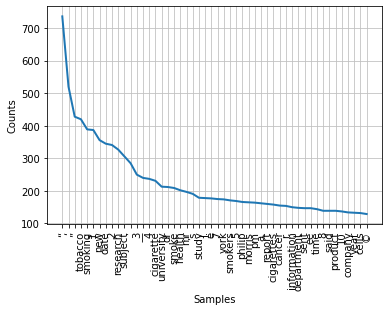

In [32]:
_ = freq.plot(50, cumulative=False)

### 2.2.2  Lemmatisation

Le processus de « [**lemmatisation**](https://fr.wikipedia.org/wiki/Lemmatisation) » consiste à représenter les mots (ou [lemmes](https://fr.wikipedia.org/wiki/Lemme_(linguistique)) en linguistique) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. On ne **conserve que le sens des mots** utilisés dans le corpus. 


In [33]:
doc = nlp("Better to have friends and games during worse times ")

for token in doc:
    print('Word:', token.text, '\t', 'Lemma:', token.lemma_) # Comment obtenir le lemme d'un mot

Word: Better 	 Lemma: well
Word: to 	 Lemma: to
Word: have 	 Lemma: have
Word: friends 	 Lemma: friend
Word: and 	 Lemma: and
Word: games 	 Lemma: game
Word: during 	 Lemma: during
Word: worse 	 Lemma: bad
Word: times 	 Lemma: time


**<span style="color:red">To do</span>**:

> * Ecrivez une méthode de prétraitement qui effectue également la lemmatisation. Utilisez [```spaCy```](https://spacy.io/usage/linguistic-features#lemmatization/) pour la tokenisation, et supprimez les mots vides et punctuation (`spacy_stopwords + punctuation`), et tous les autres **tokens** qui, selon vous, nuiront à la précision des algorithmes d'apprentissage automatique (nombres ? ponctuation ? Etc.)


In [34]:
def preprocess_with_lemmatisation(phrase):
    
    phrase = phrase.lower()
    
    doc = nlp(phrase)
    
    tokens = []
    
    for i in doc :
        tokens.append(i.lemma_)
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text_with_lemmatisation'] = data['text'].apply(preprocess_with_lemmatisation)

In [35]:
data.head()

,path,label,text,cleaned_text,cleaned_text_nltk,cleaned_text_with_lemmatisation
0,data/Tobacco3482-text/Scientific/2051025161.txt,Scientific,MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUA...,monthly summary 25 january 1986- 24 february 1...,monthly summary 25 january 1986- 24 february 1...,monthly summary \n\n 25 january 1986- \n 24 fe...
1,data/Tobacco3482-text/Note/87705667.txt,Note,2/14/90\n\n \n\nDATE:\n\n \n\n \n \n\nSUBJE...,2/14/90 date subject mifor information jplease...,2/14/90 date : subject : mifor your informatio...,2/14/90 \n\n \n\n date : \n\n \n\n \n \n\n ...
2,data/Tobacco3482-text/Scientific/50590463-0469...,Scientific,"Cell, Vol. 59, 1107-1113, December 22, 1989, C...",cell vol 59 1107 1113 december 22 1989 copyrig...,"cell , vol . 59 , 1107-1113 , december 22 , 19...","cell , vol . 59 , 1107 - 1113 , december 22 , ..."
3,data/Tobacco3482-text/Resume/50617225-7226.txt,Resume,BIOGRAPHICAS SKETCH\n\nGive the following info...,biographicas sketch following information key ...,biographicas sketch give the following informa...,biographicas sketch \n\n give the follow infor...
4,data/Tobacco3482-text/News/2078115137.txt,News,"Tae NEWS & OBSERVER\n\nFaday, Ocroagr 15, 1999...",tae news observer faday ocroagr 15 1999 advise...,"tae news & observer faday , ocroagr 15 , 1999 ...","tae news & observer \n\n faday , ocroagr 15 , ..."


In [36]:
print(data['cleaned_text'][0])

monthly summary 25 january 1986- 24 february 1986 david douglas 1 non burning smoking article additional work subject month examining filtration effect cellulose acetate filter versus filter sample examined iff tobacco neutral fraction flavor microliters sample applied piece filter paper inside plastic tube like flavor development non burning smoking article thirty ml puffs withdrawn alternately end containing filter end open results chromatograms produced samples taken ways showed later polar volatile components reduced disproportionately puffed filter compared sample taken filter observation implications use tobacco identical flavors burning non burning smoking products flavor apparently natural representative tobacco identical flavors additional work anticipated area desired supervisors chemical research division aid divisional goals major r&d programs memo summarizing observations date written 2 setup electron capture detector additional work ecd discussed month document work pe da

In [37]:
print(data['cleaned_text_with_lemmatisation'][0])

monthly summary 

 25 january 1986- 
 24 february 1986 

 for : david douglas 
 1 . non - burning smoking article : 

 additional work on this subject be do this month by examine the 
 filtration effect of a cellulose acetate filter versus no filter . the 
 sample examine be an iff tobacco neutral fraction flavor . fifty 
 microliter of the sample be apply to a piece of filter paper inside a 
 plastic tube like those use by flavor development for the non - burning 
 smoking article . thirty - five ml puff be withdraw alternately at one end 
 contain a ca filter and at the other end , which be open . the result of 
 chromatogram produce by sample take in these way show that the later , 
 more polar , less volatile component be reduce disproportionately when 
 puff through the ca filter compare to a sample take with no filter . 

 this observation could have implication for the use of tobacco - identical 
 flavor in both burning and non - burning smoking product , since this flavor 
 be 


### 2.2.3 Racinisation

Un autre processus, la [**racinisation**](https://fr.wikipedia.org/wiki/Racinisation) (ou *stemming* en anglais) a une approche similaire. Cela consiste à ne conserver que la racine des mots étudiés : on supprime suffixes, préfixes et autres afin de ne conserver que la racine. 

In [38]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

La **racinisation** va tronquer les mots, par exemple comme ci-dessous :

In [39]:
doc = nlp("Better to have friends and games during worse times")
for token in doc:
    print('Word:', token.text, '\t', 'Lemma:', stemmer.stem(token.text))

Word: Better 	 Lemma: better
Word: to 	 Lemma: to
Word: have 	 Lemma: have
Word: friends 	 Lemma: friend
Word: and 	 Lemma: and
Word: games 	 Lemma: game
Word: during 	 Lemma: dure
Word: worse 	 Lemma: wors
Word: times 	 Lemma: time


**<span style="color:red">To do</span>**:

> * Ecrivez une méthode de prétraitement qui effectue également la racinisation.

In [40]:
def preprocess_with_stemming(phrase):
    
    phrase = phrase.lower()
    
    doc = nlp(phrase)
    
    tokens = []
    
    for i in doc :
        tokens.append(stemmer.stem(i.text))
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None


data['cleaned_text_with_stemming'] = data['text'].apply(preprocess_with_stemming)

In [41]:
data.head()

,path,label,text,cleaned_text,cleaned_text_nltk,cleaned_text_with_lemmatisation,cleaned_text_with_stemming
0,data/Tobacco3482-text/Scientific/2051025161.txt,Scientific,MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUA...,monthly summary 25 january 1986- 24 february 1...,monthly summary 25 january 1986- 24 february 1...,monthly summary \n\n 25 january 1986- \n 24 fe...,month summari \n\n 25 januari 1986- \n 24 febr...
1,data/Tobacco3482-text/Note/87705667.txt,Note,2/14/90\n\n \n\nDATE:\n\n \n\n \n \n\nSUBJE...,2/14/90 date subject mifor information jplease...,2/14/90 date : subject : mifor your informatio...,2/14/90 \n\n \n\n date : \n\n \n\n \n \n\n ...,2/14/90 \n\n \n\n date : \n\n \n\n \n \n\n ...
2,data/Tobacco3482-text/Scientific/50590463-0469...,Scientific,"Cell, Vol. 59, 1107-1113, December 22, 1989, C...",cell vol 59 1107 1113 december 22 1989 copyrig...,"cell , vol . 59 , 1107-1113 , december 22 , 19...","cell , vol . 59 , 1107 - 1113 , december 22 , ...","cell , vol . 59 , 1107 - 1113 , decemb 22 , 19..."
3,data/Tobacco3482-text/Resume/50617225-7226.txt,Resume,BIOGRAPHICAS SKETCH\n\nGive the following info...,biographicas sketch following information key ...,biographicas sketch give the following informa...,biographicas sketch \n\n give the follow infor...,biographica sketch \n\n give the follow inform...
4,data/Tobacco3482-text/News/2078115137.txt,News,"Tae NEWS & OBSERVER\n\nFaday, Ocroagr 15, 1999...",tae news observer faday ocroagr 15 1999 advise...,"tae news & observer faday , ocroagr 15 , 1999 ...","tae news & observer \n\n faday , ocroagr 15 , ...","tae news & observ \n\n faday , ocroagr 15 , 19..."


# 4. Representation des mots


## 4.1 « *bag of words* » (sac de mots)

L’**extraction d’information** est l’étape qui suit le **nettoyage** du corpus. Pour ce faire, il nous faut changer la représentation du texte pour qu’il puisse être utilisé par un modèle statistique, et pour pouvoir l’exploiter.

Une représentation **bag-of-words** classique sera donc celle dans laquelle on représente chaque document par un vecteur de la taille du vocabulaire $|V|$. On utilisera la matrice composée de l’ensemble de ces $N$ documents qui forment le corpus comme entrée de nos algorithmes.

Nous allons voir comment cela fonctionne et imprimer les mots les plus pertinents à l’aide de la classe [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) de `scikit-learn`.

Ceci est juste un petit exemple avec les documents de 110 à 130 (problèmes de ressources mémoire).


In [42]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(np.hstack(data['cleaned_text'][110:130]))

X = vectorizer.transform(np.hstack(data['cleaned_text'][110:130])) # 

weights = np.asarray(X.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
1,000,1.50
1907,research,1.40
1538,mutations,1.15
331,al,1.05
1848,ras,1.05
2267,tropomyosin,1.05
754,de,1.05
2296,university,0.95
38,12,0.95
2230,tobacco,0.90


## 4.1 « *TF-IDF* » (*Term-Frequency* − *Inverse Document Frequency*)

Ce que nous désirons faire avec [**TF-IDF**](https://fr.wikipedia.org/wiki/TF-IDF) est de mettre en application ce qui est décrit précédemment. Nous voulons pondérer la fréquence d’apparition d’un lemme dans un document par rapport à son apparition dans l’ensemble des documents du corpus. La fréquence de chaque lemme est donc pondérée à l’ensemble du corpus.

En l’occurence, la métrique **TF-IDF** (*Term-Frequency* − *Inverse Document Frequency*) utilise comme indicateur de similarité l’*inverse document frequency* qui est l’inverse de la proportion de document qui contient le terme, à l'échelle logarithmique.

Nous calculons donc le poids **TF-IDF** final attribué au n-gramme :

$tfidf_{i,j} = tf_{i,j} × idf_{i}$

Pour connaître les termes qui représentent le plus un document, nous allons utiliser la [fonction **TF-IDF**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de `scikit-learn`.


**Note :** nous traitons des *n-grames*, donc utilisez le paramètre [`ngram_range`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de la classe [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) lors de son instanciation.

**Note :** pour transformer vos vecteurs résultats (obtenus par appel à `fit_transform`) en des données utilisables dans un `DataFrame`, vous devez utiliser `vectors.toarray()`. À la création de votre `DataFrame`, nommez les colonnes avec le nom des lemmes utilisés (ce sont les *features* de l’opération, vous pouvez les récupérer avec `get_feature_names()`).

**Note :** comment on renverse une matrice ? En demandant sa transposée. Pour la transposée d’un `pd.DataFrame`, on accède simplement l’attribut `T` du `pd.DataFrame`.

In [43]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,10))
vectors = vectorizer.fit_transform(np.hstack(data['cleaned_text']))#[110:130]

weights = np.asarray(vectors.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
769881,smoking,0.005039
841553,tobacco,0.004886
260438,date,0.004768
799874,subject,0.004389
560976,new,0.004160
704159,research,0.004134
547779,mr,0.003694
631890,pm,0.003608
298727,dr,0.003566
205605,cigarette,0.003498


### 4. 2 Plongements de mots (Word Embeddings)

La dernière répresentation des mots que nous analyserons est la répresentation **word embeddings**. 
Les **plongements de mots** (ou *word embedding*) est une technique d'apprentissage et de représentation de mots d’un texte. Elle consiste à représenter les mots sous forme de vecteurs de nombres réels qui ont la particularité d’être proches (dans leurs espaces vectoriels) si leurs contextes sont similaires.

Ils peuvent être générés de plusieurs façons, comme les [réseaux de neuronnes](https://www.tensorflow.org/tutorials/text/word_embeddings) ou les matrices de [cooccurences](https://fr.wikipedia.org/wiki/Cooccurrence), des modèles probabilistes (TF-IDF vecteurs), etc.

Cette nouvelle représentation a ceci de particulier que les mots apparaissant dans des contextes similaires possèdent des vecteurs correspondants qui sont relativement proches. Par exemple, on pourrait s'attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l'espace vectoriel où sont définis ces vecteurs. Cette technique est basée sur l'hypothèse qui veut que les mots apparaissant dans des contextes similaires ont des significations apparentées. 

<figure>
    <center>
    <img src="images/we.png" width="300" height="400">
    <figcaption>Source: <a href="https://unbabel.com/blog/fr/lia-vous-parle-mais-comprend-elle-ce-quelle-dit/"> link</a></figcaption>
    </center>
</figure>

Différents  plongements (embeddings) de mots qui ont été entrainées sur de grands ensembles de données et disponibles :

*  [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec Google News](https://code.google.com/archive/p/word2vec/)
* [GloVe](https://nlp.stanford.edu/projects/glove/)
* [FastText](https://github.com/facebookresearch/fastText)


Le word embedding d'un mot peut être récupérée en utilisant la bibliothèque **spaCy** (cette bibliothèque utilise le modèle [GloVe](https://nlp.stanford.edu/projects/glove/)).


In [44]:
token = nlp("cigarretes")
token, token.vector.shape, token.vector

(cigarretes,
 (300,),
 array([-2.2954e-01, -2.8187e-01,  5.9479e-02,  4.7612e-02, -2.3460e-01,
         2.0453e-01,  9.1744e-04, -6.6969e-01,  4.5903e-01, -3.7258e-01,
         1.1062e-01,  6.1489e-01, -1.0346e+00, -2.1351e-01,  4.2290e-01,
         6.3530e-03, -1.6024e-01, -6.3138e-02, -3.3088e-02,  3.5068e-01,
         1.0806e-01,  5.8254e-01, -1.9157e-01,  6.2607e-02, -2.8079e-01,
        -3.1789e-02, -3.7105e-01, -1.6022e-01,  4.1643e-01,  5.6944e-01,
        -2.1847e-02, -3.7103e-01, -3.6335e-01,  2.3406e-01, -2.7031e-01,
         6.7263e-01,  6.9996e-01,  1.9659e-01,  6.7637e-02,  2.2632e-01,
        -5.4569e-01,  5.6867e-01,  8.0658e-01, -1.8067e-01,  2.6330e-01,
         2.0911e-01,  7.5932e-02, -8.0514e-01, -4.2663e-01, -7.2892e-03,
        -7.9666e-01,  1.3726e-01,  1.0944e-01,  2.7195e-01,  4.6507e-01,
        -5.5523e-01,  2.9686e-01, -1.8384e-01, -3.4570e-02, -1.4615e-01,
         5.7205e-02, -6.2007e-01,  2.5968e-01, -3.0072e-01,  4.4997e-01,
        -1.7152e-01,  5.2898e

**spaCy** est capable de comparer deux mots et de faire une prédiction de leur similitude. La prédiction de la similarité est utile pour créer des systèmes de recommandation ou pour signaler les doublons. Par exemple, vous pouvez suggérer un contenu similaire à ce que l'utilisateur recherche actuellement ou étiqueter un ticket d'assistance comme doublon s'il est très similaire à un ticket déjà existant.

Chaque **Doc**, **Span** et **Token** est livré avec une **.similarity()** méthode qui vous permet de le comparer avec un autre objet et de déterminer la similitude. Bien sûr, la similitude est toujours subjective - si «chien» et «chat» sont similaires dépend vraiment de la façon dont vous le regardez. Le modèle de similarité de **spaCy** suppose généralement une définition assez générale de la similitude.

Généralement, ene fois que nous aurons des vecteurs du texte donné, pour calculer la similitude entre les vecteurs générés, des méthodes statistiques pour la similitude vectorielle peuvent être utilisées. Ces techniques sont la *similitude cosinus*, la *distance euclidienne*, la *distance de Jaccard*, la distance *word mover*. La *similitude cosinus* est la technique qui est largement utilisée pour la similitude de texte (**spaCy** utilise cette similitude).


In [45]:
token = nlp('cigarettes')
for word in ['cigarettes', 'health', 'cancer', 'capitalism', 'doctor', 'nurse', 'hospital', 'money', 'death']:
    word = nlp(word)
    print('cigarettes', '~', word, ':', token.similarity(word))

cigarettes ~ cigarettes : 1.0
cigarettes ~ health : 0.28587997521776504
cigarettes ~ cancer : 0.3012196440759192
cigarettes ~ capitalism : 0.10472264863981527
cigarettes ~ doctor : 0.21723711004349328
cigarettes ~ nurse : 0.0906844532117962
cigarettes ~ hospital : 0.16957132100247158
cigarettes ~ money : 0.32551857206247076
cigarettes ~ death : 0.19340284215840023


Pour voir l'exemple de la figure présentée précédemment, nous calculons la distance entre tous les mots * spaCy * pour trouver les mots les plus similaires pour le calcul: **king − man + woman ≈ queen**

In [46]:
from scipy import spatial
 
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
 
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector
 
# Nous devons maintenant trouver le vecteur le plus proche du vocabulaire du résultat de "man" - "woman" + "queen"
maybe_king = man - woman + queen
computed_similarities = []
 
for word in nlp.vocab:
    # Ignorer les mots sans vecteurs
    if not word.has_vector:
        continue

    similarity = cosine_similarity(maybe_king, word.vector)
    computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print('man - woman + queen=', [w[0].text for w in computed_similarities[:5]])

man - woman + queen= ['Queen', 'QUEEN', 'queen', 'King', 'KING']


# 5. Preparation pour apprentissage automatique (machine learning) et apprentissage profond (deep learning)

### 5.1 Diviser les jeux de données 
Afin d'entraîner des modèles pour apprentissage automatique et évaluer la performance de ses modèles avec chaque répresentation de mots, nous allons diviser les jeux de données en : entraînement, validation et test.

Afin d'évaluer correctement la performance de chaque modèle, il est très important que les données d'entraînement et de test soient différentes. La bibliothèque <b>sklearn</b> a la fonction <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><i>train_test_split</i></a> qui divise un jeux de données. Le parametre <i>test_size</i> défini la taille du test (pourcentage) dans les jeux de données.

Pour comprendre pourquoi nous devons diviser les données de cette manière, vous pouvez regarder Andrew Ng expliquer [ici](https://www.youtube.com/watch?v=1waHlpKiNyY). Ng est professeur à l'Université de Stanford et pionnier de l'éducation en ligne, Ng a cofondé [Coursera](https://www.coursera.org/learn/machine-learning) et [deeplearning.ai](https://www.deeplearning.ai/). Il a mené avec succès de nombreux efforts pour «démocratiser l'apprentissage profond» en enseignant plus de 2,5 millions d'étudiants grâce à ses cours en ligne. Il est l'un des informaticiens les plus connus et les plus influents au monde.

Dans notre cas, nous irons fournir les phrases et les classes pour chaque phrase et la taille du jeu de données de test. Pour l'instant, on a pas besoin de donees de validation. On va voir de ca plus tard.

Pour plus de simplicité, nous allons travailler uniquement avec des données pour entraînement et test.

In [47]:
from sklearn.model_selection import train_test_split

# Nous utilisons ici la colonne qui n'a pas été prétraitée.
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.1)
print('Train:', len(X_train), 'texts', 'Test:', len(X_test), 'texts')

Train: 622 texts Test: 70 texts


# 6. Apprentissage automatique (machine learning)

L'objectif de la catégorisation de textes est de pouvoir associer automatiquement des documents à des classes (catégories, étiquettes, index) prédéfinies. Nous nous plaçons dans le cadre de l'apprentissage automatique supervisé. 



### 5.2 Approaches de classification

La classification naïve bayésienne est un type de classification bayésienne probabiliste simple basée sur le théorème de Bayes avec une forte indépendance des hypothèses. Elle met en œuvre un classifieur bayésien naïf, ou classifieur naïf de Bayes, appartenant à la famille des classifieurs linéaires. 

Un classifieur bayésien naïf suppose que l'existence d'une caractéristique pour une classe, est indépendante de l'existence d'autres caractéristiques. Un fruit peut être considéré comme une pomme s'il est rouge, arrondi, et fait une dizaine de centimètres. Même si ces caractéristiques sont liées dans la réalité, un classifieur bayésien naïf déterminera que le fruit est une pomme en considérant indépendamment ces caractéristiques de couleur, de forme et de taille. 

Le modèle probabiliste de cette approache est le modèle conditionnel $P(X | x_1,...,x_n)$, où $X$ est la variable « de classe » (celle qui indique si un individu appartient à une classe donnée) conditionnée par plusieurs variables caractéristiques $x_i$ (par exemple l’aile, le bec et cancane).

Le théorème de Bayes s’énonce avec nos notations de la manière suivante :

<center>
$P(X|x_1, ..., x_n) = \frac{P(x_1, ..., x_n | X)P(X)}{P(x_1, ..., x_n)}$
</center>

L'avantage du classifieur bayésien naïf est qu'il requiert relativement peu de données d'entraînement pour estimer les paramètres nécessaires à la classification, à savoir moyennes et variances des différentes variables.

La bibliothèque sklearn fournit une classe [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) qui nous permet d'entraîner et tester un modèle à partir d'un jeux de données d'entraînement.

Tout d'abord, nous représentons les documents en utilisant TF-IDF.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # Nous laissons le TF-IDF voir les données d'entraînement

X_test_tfidf = vectorizer.transform(X_test) # Nous transformons également les données de test

Ensuite, nous utilisons les données d'entraînement pour entraîner le modèle.

In [49]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

_ = clf.fit(X_train_tfidf, y_train) # Nous entrainons le modèle avec la méthode `fit`

Après avoir entraîné notre modèle, nous pouvons faire la prediction des classes des messages du jeux de données de test.
 
## Analyse d'erreurs

Le taux d'erreur de classification donne une évaluation des performances pour toutes les classes. Mais comme les classes ne sont pas également réparties, elles peuvent ne pas être également bien modélisées. Afin d'avoir une meilleure idée des performances du classifieur, des métriques détaillées doivent être utilisées:

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) fournit une analyse détaillée par classe: la précision (parmi tous les exemples classés en classe X, combien sont réellement de la classeX) et le rappel (parmi tous les exemples qui sont de la classe X, combien sont classés en classe X) et le F-Score qui est une moyenne harmonique pondérée de la précision et du rappel.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) qui donnent les confusions entre les classes.

F1-score = 2 x $\frac{précision\ x\ rappel}{précision\ +\ rappel}$

 - précision : la proportion d'identifications positives était effectivement correcte.
 - rappel : la proportion de résultats positifs réels a été identifiée correctement. 


**<span style="color:red">To do</span>**:

> * Rapportez le `classification_report` pour votre classificateur. Quelles classes ont les meilleurs scores ? Pourquoi ?
> * Rapportez la `confusion_matrix` pour votre classificateur. Quelles classes sont les plus confuses ? Pourquoi ?

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Advertisement       0.00      0.00      0.00         3
        Email       0.75      0.60      0.67        10
         Form       0.67      0.57      0.62         7
       Letter       0.29      0.56      0.38         9
         Memo       0.44      0.94      0.60        18
         News       0.00      0.00      0.00         3
         Note       0.00      0.00      0.00         6
       Report       0.00      0.00      0.00         5
       Resume       0.00      0.00      0.00         4
   Scientific       0.00      0.00      0.00         5

     accuracy                           0.46        70
    macro avg       0.21      0.27      0.23        70
 weighted avg       0.32      0.46      0.36        70



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


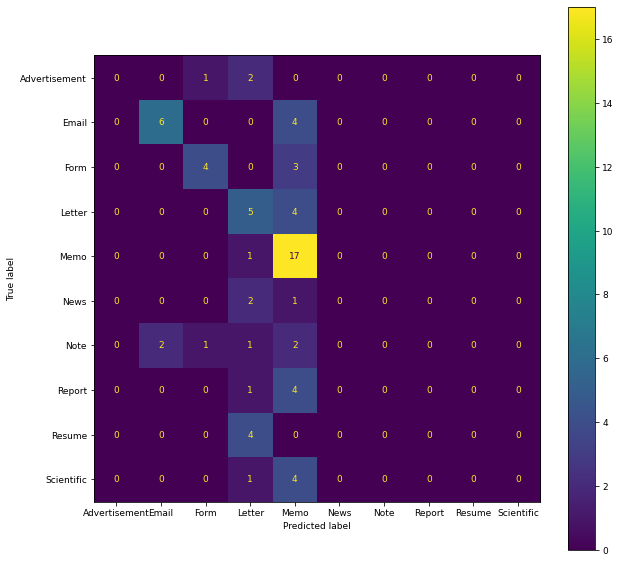

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 9})

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test)  
plt.show() 

Les machines à vecteurs de support (en anglais support vector machine, SVM) sont un ensemble de techniques d'apprentissage supervisé destinées à résoudre des problèmes de discrimination et de régression. Ces techniques reposent sur deux idées clés : la notion de marge maximale et la notion de fonction noyau.

La <b>marge</b> est la distance entre la frontière de séparation et les échantillons les plus proches. Dans les SVM, la frontière de séparation est choisie comme celle qui maximise la marge.

<figure>
    <center>
    <img src="images/marge.png" width="400" height="400">
    <figcaption>Source: <a href="https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support"> link</a></figcaption>
    </center>
</figure>

La deuxième idée clé des SVM est de transformer l'espace de représentation des données d'entrées en un espace de plus grande dimension, dans lequel il est probable qu'il existe une séparation linéaire. Les fonctions <b>noyau</b> permettent de transformer un produit scalaire dans un espace de grande dimension, ce qui est coûteux, en une simple évaluation ponctuelle d'une fonction. Des noyaux usuels employés avec les SVM sont : le noyau polynomial et le noyau gaussien.

<figure>
    <center>
    <img src="images/noyau.png" width="400" height="400">
    <figcaption>Source: <a href="https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support"> link</a></figcaption>
    </center>
</figure>

La bibliothèque sklearn propose un module pour utiliser de [SVMs](https://scikit-learn.org/stable/modules/svm.html). Si vous souhaitez utiliser SVM avec d'autres noyaux, utilisez [svm.SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

**<span style="color:red">To do</span>**:

> * Entraînez, testez et faites l'évaluation du modèle SVM linéaire.


In [52]:
from sklearn.svm import LinearSVC

# YOUR CODE HERE

clf = LinearSVC()

_ = clf.fit(X_train_tfidf, y_train)

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Advertisement       1.00      0.67      0.80         3
        Email       0.89      0.80      0.84        10
         Form       0.58      1.00      0.74         7
       Letter       0.73      0.89      0.80         9
         Memo       0.73      0.89      0.80        18
         News       1.00      1.00      1.00         3
         Note       0.00      0.00      0.00         6
       Report       1.00      0.20      0.33         5
       Resume       1.00      1.00      1.00         4
   Scientific       0.67      0.80      0.73         5

     accuracy                           0.76        70
    macro avg       0.76      0.72      0.70        70
 weighted avg       0.73      0.76      0.71        70



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


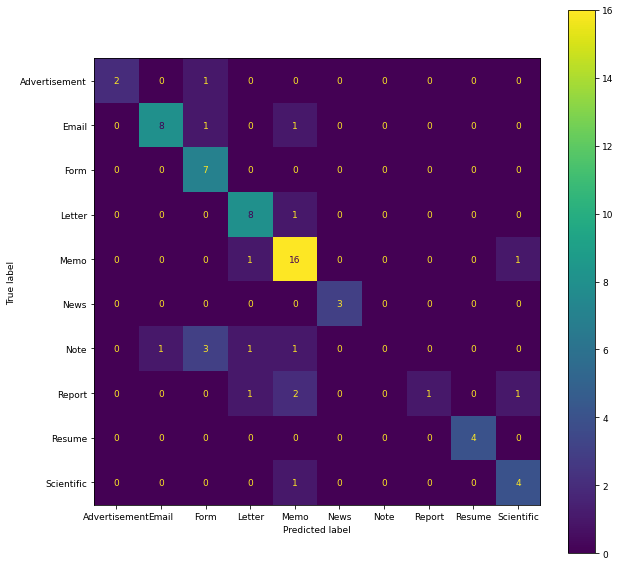

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# YOUR CODE HERE
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 9})

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test)  
plt.show() 

**<span style="color:red">To do</span>**:

> * Utilisez les autres méthodes de prétraitement (avec lemmatisation, avec racinisation, etc. `cleaned_text`, `cleaned_text_with_lemmatisation`, `cleaned_text_with_stemming`) et comparez les résultats de ces trois modèles. Vous devez réécrire le code à partir de "5.1 Diviser les jeux de données" et changer la colonne de données.


In [55]:
# YOUR CODE HERE

In [56]:
# YOUR CODE HERE

In [57]:
# YOUR CODE HERE

In [58]:
# YOUR CODE HERE

In [59]:
# YOUR CODE HERE

In [60]:
# YOUR CODE HERE

# 7. Apprentissage profond (deep learning)

## Classification avec des réseaux de neurones

Les réseaux de neurones peuvent être entraînés pour apprendre à la fois la représentation vectorielle des mots (au lieu de tf-idf) et comment classer les documents. Le code ci-dessous vous permet d'entraîner un classificateur de texte neuronal à l'aide de l'intégration de mots à l'aide de Keras. La plupart du code est écrit, il suffit de définir l'architecture du réseau avec les bons paramètres avant de l'entraîner:

**<span style="color:red">To do</span>**:

> * Aller plus loin. Vérifiez [Text classification Keras examples](https://keras.io/examples/nlp/)

> * Définissez un réseau de neurones dans la fonction `get_model()` avec les paramètres suivants:
> * n'utiliser que les 20000 mots les plus fréquents dans les documents MAX_FEATURES
> * utiliser 1024 comme nombre maximal de mots dans les articles MAX_TEXT_LENGTH
> * utiliser une taille de 300 pour les embeddings EMBEDDING_SIZE: [word embeddings](https://keras.io/layers/embeddings/)
> * utiliser d'autres valeurs pour les ngram_filters filtres convolutifs: [couche convolutive 1D](https://keras.io/layers/convolutional/#conv1d)
> * Ajoutez une couche Dropout à l'endroit indiqué avec le valeur 0,2 [Dropout](https://keras.io/api/layers/regularization_layers/dropout/)
> * Former le modèle.

> * Comment ce réseau de neurones se compare-t-il aux autres modèles? 
> * Quelle est la performance?
> * Qu'apporte le changement de paramètres dans la performance?
> * Utilisez des plongements pré-entraînés et chargez-les en tant que poids dans ce modèle (au lieu de ceux générés aléatoirement)

In [61]:
import ast
import os
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
import numpy as np
import itertools
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Concatenate

import tensorflow as tf

Configurez les paramètres du modèle.

In [62]:
MAX_FEATURES = 20000 # YOUR CODE HERE
MAX_TEXT_LENGTH = 1024 # YOUR CODE HERE
EMBEDDING_SIZE  = 300 # YOUR CODE HERE
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

Cette methode transforme chaque texte des textes en une séquence d'entiers [Plus d'info](https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do). Donc, il prend chaque mot dans le texte et le remplace par sa valeur entière correspondante du dictionnaire [word_index](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer). Le dictionnaire a été obtenu à partir de [fit_on_texts](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer).


In [63]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

In [64]:
# Obtenez la liste des différentes classes

CLASSES_LIST = np.unique(data['label'])
n_out = len(CLASSES_LIST)

print(CLASSES_LIST, n_out)

['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific'] 10


In [65]:
def get_model():

    inputs = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, EMBEDDING_SIZE)(inputs)
    # YOUR CODE HERE couche Dropout
    model.add(Dense(0,2))
    
    ngram_filters = [2, 3, 4] # YOUR CODE HERE Modifier les valeurs n-gramme
    filters = [300]*3

    convs = []
    for kernel_size, filter_length in zip(ngram_filters, filters):
        conv = Conv1D(filters=filter_length,
                      kernel_size=kernel_size,
                      padding='same',
                      activation='relu')(model)
        convs.append(conv)

    model = Concatenate()(convs)
    model = GlobalMaxPooling1D()(model)    

    outputs = Dense(n_out, activation="softmax")(model)
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

Cette méthode est pour entraîner et tester le modèle.

In [66]:
def train_fit_predict(model, X_train, X_test, y):
    
    model.fit(X_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(X_test)

Pour que le modèle comprenne les étiquettes, elles doivent être sous forme entière. Ainsi, pour cela, il existe cette méthode: [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [67]:
# Convertir la chaîne de classe en index (entiers)
from sklearn import preprocessing
label_en = preprocessing.LabelEncoder()
le = label_en #CORRECTION
le.fit(CLASSES_LIST)

y_train_encoded = le.transform(y_train) 
y_test_encoded = le.transform(y_test) 
train_y_cat = to_categorical(y_train_encoded, n_out)

In [68]:
y_train_encoded[:5]

array([1, 2, 1, 3, 9])

In [69]:
train_y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
# obtenir les données textuelles dans le format correct pour le réseau neuronal
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
len(x_vec_train), len(x_vec_test)

(622, 70)

In [71]:
# définir la topologie du réseau neuronal
model = get_model()

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat).argmax(1)

AttributeError: 'Tensor' object has no attribute 'add'

In [ ]:
print(classification_report(y_test_encoded, y_predicted, target_names=CLASSES_LIST))

et voilà !